Nama  = Faiha Atsaa Sukendar<br>
NIM   = 211351052<br>
Kelas = IFMB

# Import Dataset Kaggle

In [28]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"actcasukendar","key":"8abaa15b45fa2badcab81530ab99cbdf"}'}

In [29]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [30]:
!kaggle datasets download -d sulmansarwar/transactions-from-a-bakery

transactions-from-a-bakery.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
import zipfile
zip_ref = zipfile.ZipFile('/content/transactions-from-a-bakery.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Library

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data Exploration

In [33]:
df = pd.read_csv('/content/BreadBasket_DMS.csv')

In [34]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [35]:
df['Date']=pd.to_datetime(df['Date'], format = "%Y-%m-%d")

In [36]:
df['Date'].dtype

dtype('<M8[ns]')

In [37]:
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.weekday
df['year']=df['Date'].dt.year

In [38]:
df.head()

,Date,Time,Transaction,Item,month,day,year
0,2016-10-30,09:58:11,1,Bread,10,6,2016
1,2016-10-30,10:05:34,2,Scandinavian,10,6,2016
2,2016-10-30,10:05:34,2,Scandinavian,10,6,2016
3,2016-10-30,10:07:57,3,Hot chocolate,10,6,2016
4,2016-10-30,10:07:57,3,Jam,10,6,2016


# EDA ( MIN 5 )

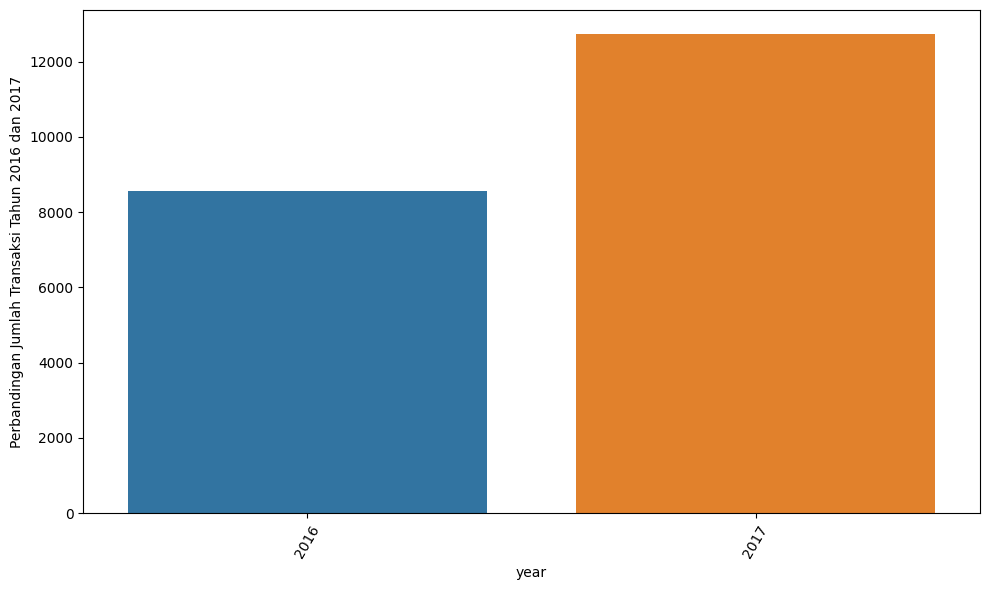

In [39]:
n_credits = df.groupby("year")["Transaction"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="year",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Perbandingan Jumlah Transaksi Tahun 2016 dan 2017")
plt.tight_layout()

Grafik Menunjukan tahun dengan penjualan terbanyak adalah 2017

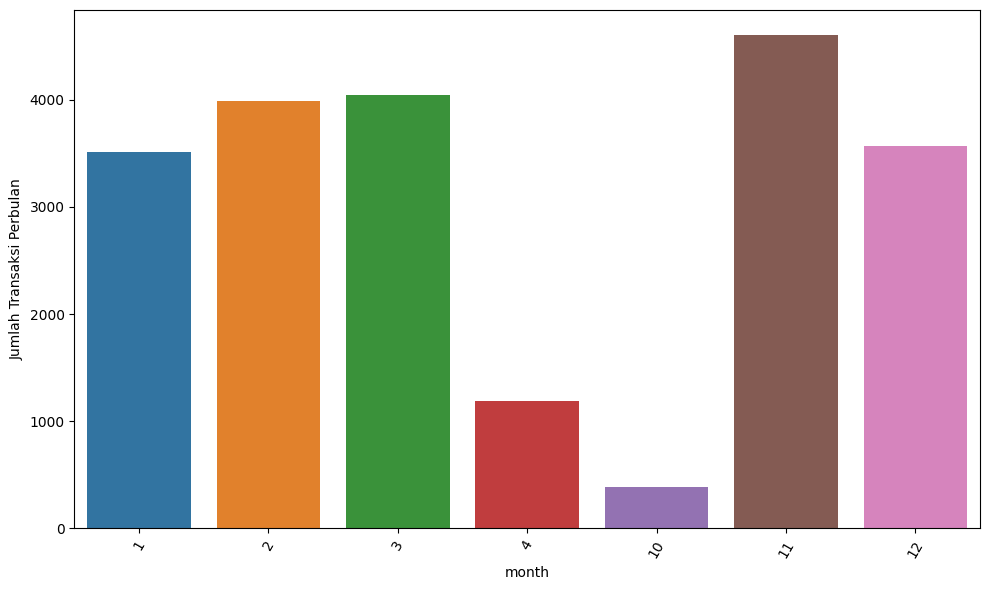

In [40]:
n_credits = df.groupby("month")["Transaction"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="month",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Jumlah Transaksi Perbulan")
plt.tight_layout()

Grafik Menunjukan bulan dengan penjualan terbanyak adalah November

Text(0.5, 1.0, 'Total Transaksi Perhari')

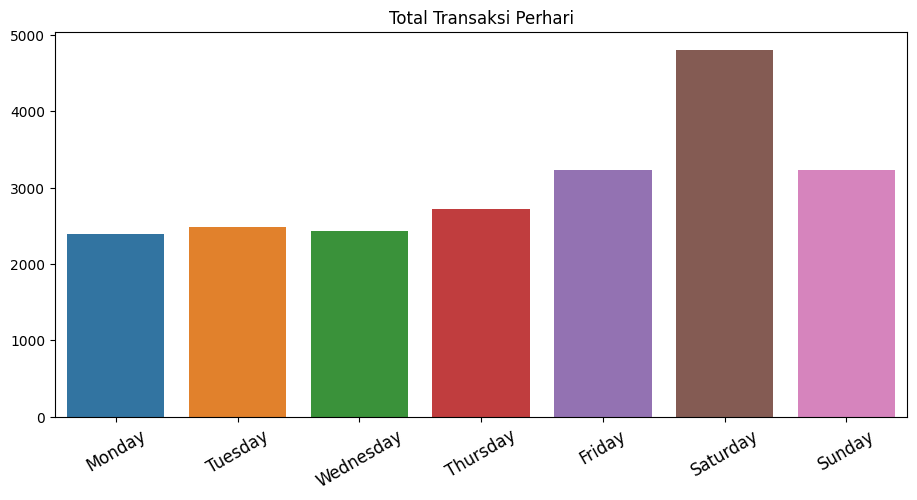

In [41]:
data_perday = df.groupby('day')['Transaction'].count()

plt.figure(figsize= (11,5))
sns.barplot(
    x=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    y=data_perday.values)
plt.xticks(size = 12, rotation = 30)
plt.title('Total Transaksi Perhari')

Grafik Menunjukan hari dengan penjualan terbanyak adalah Sabtu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12:07:39'),
  Text(1, 0, '10:45:21'),
  Text(2, 0, '10:55:19'),
  Text(3, 0, '14:38:01'),
  Text(4, 0, '15:09:18'),
  Text(5, 0, '14:35:34'),
  Text(6, 0, '13:43:08'),
  Text(7, 0, '14:19:47'),
  Text(8, 0, '15:26:25'),
  Text(9, 0, '13:44:56'),
  Text(10, 0, '14:14:17'),
  Text(11, 0, '15:46:51'),
  Text(12, 0, '12:45:14'),
  Text(13, 0, '14:08:27'),
  Text(14, 0, '13:08:30'),
  Text(15, 0, '13:14:04'),
  Text(16, 0, '12:58:48'),
  Text(17, 0, '15:35:06'),
  Text(18, 0, '12:07:19'),
  Text(19, 0, '14:18:20'),
  Text(20, 0, '12:16:32'),
  Text(21, 0, '13:41:06'),
  Text(22, 0, '12:49:53'),
  Text(23, 0, '16:09:51'),
  Text(24, 0, '13:19:35')])

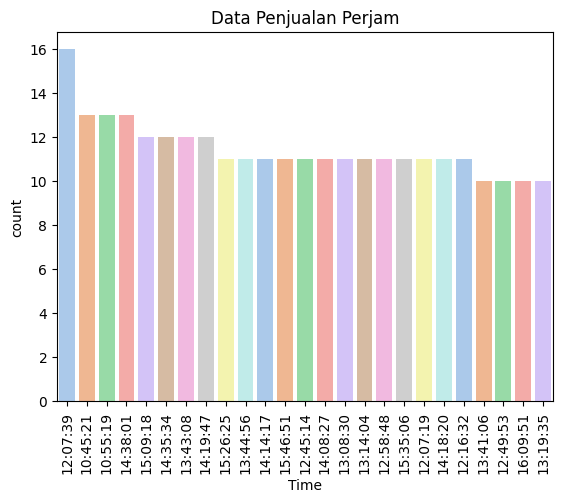

In [42]:
palette = sns.color_palette("pastel")
sns.countplot(x = 'Time', data = df, order = df['Time'].value_counts().iloc[:25].index,palette=palette)
plt.title("Data Penjualan Perjam")
plt.xticks(rotation=90)

Grafik Menunjukan jam dengan penjualan terbanyak adalah 12:07 atau siang hari

<Axes: xlabel='Item', ylabel='count'>

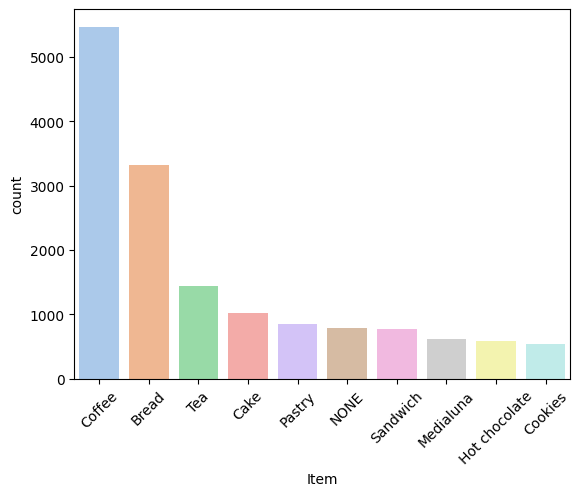

In [43]:
palette = sns.color_palette("pastel")
plt.xticks(rotation=45)
sns.countplot(x = 'Item', data = df, order = df['Item'].value_counts().iloc[:10].index, palette=palette)

Grafik Menunjukan item dengan penjualan terbanyak adalah Kopi

# Data Preparation

In [44]:
df['Item'] = df['Item'].apply(lambda item: item.lower())
df['Item'] = df['Item'].apply(lambda item: item.strip())

In [45]:
df = df[['Transaction','Item']].copy()
df.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [46]:
from mlxtend.frequent_patterns import association_rules, apriori

In [47]:
item_count = df.groupby(["Transaction","Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [48]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns= 'Item', values = 'Count', aggfunc = 'sum').fillna(0)
print("Ukuran Dataset", item_count_pivot.shape)
item_count_pivot.head(5)

Ukuran Dataset (9531, 95)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
item_count_pivot = item_count_pivot.astype('int32')
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
def encode(x):
  if x <=0:
    return 0
  elif x >= 0:
    return 1

item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
print("Ukuran Dataset", item_count_pivot.shape)
print("Jumlah Transaksi", item_count_pivot.shape[0])
print("Jumlah Item", item_count_pivot.shape[1])

Ukuran Dataset (9531, 95)
Jumlah Transaksi 9531
Jumlah Item 95


# Modelling

In [52]:
support = 0.02
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False).head(10)

,support,itemsets
4,0.475081,(coffee)
1,0.324940,(bread)
17,0.141643,(tea)
3,0.103137,(cake)
21,0.089393,"(coffee, bread)"
12,0.085510,(pastry)
11,0.079005,(none)
13,0.071346,(sandwich)
9,0.061379,(medialuna)
7,0.057916,(hot chocolate)


In [53]:
metric ="lift"
min_threshold = 0.5

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)
rules.sort_values('support', ascending=False,inplace=True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(coffee),(bread),0.475081,0.324940,0.089393,0.188163,0.579069,-0.064980,0.831522,-0.580678
3,(bread),(coffee),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131,-0.518492
10,(coffee),(cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717,0.187545
11,(cake),(coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667,0.109767
28,(coffee),(tea),0.475081,0.141643,0.049523,0.104240,0.735936,-0.017769,0.958245,-0.406020


# Kesimpulan

Berikut adalah beberapa item yang bisa dijual dalam satu paket pembelian dimana item-tem tersebut memiliki niai confidence yang cukup tinggi dibandingkan lainnya

In [54]:
support = rules.support.to_numpy()
confidence = rules.confidence.to_numpy()
rec_rules = rules[ (rules['lift'] > 1) & (rules['confidence'] >= 0.5) ]

cols_keep = {'antecedents':'item_1', 'consequents':'item_2', 'support':'support', 'confidence':'confidence', 'lift':'lift'}
cols_drop = ['antecedent support', 'consequent support', 'leverage', 'conviction']

recommendation_basket = pd.DataFrame(rec_rules).rename(columns= cols_keep).drop(columns=cols_drop).sort_values(by=['confidence'], ascending = False)

print("Rekomendasi Paket Penjualan")
display(recommendation_basket)

Rekomendasi Paket Penjualan


,item_1,item_2,support,confidence,lift,zhangs_metric
31,(toast),(coffee),0.023502,0.704403,1.482699,0.336791
21,(medialuna),(coffee),0.034939,0.569231,1.198175,0.176213
25,(pastry),(coffee),0.047214,0.552147,1.162216,0.152626
19,(juice),(coffee),0.020460,0.534247,1.124537,0.115155
23,(none),(coffee),0.042073,0.532537,1.120938,0.117145
26,(sandwich),(coffee),0.037981,0.532353,1.120551,0.115847
11,(cake),(coffee),0.054349,0.526958,1.109196,0.109767
14,(cookies),(coffee),0.028014,0.518447,1.091280,0.088422
17,(hot chocolate),(coffee),0.029378,0.507246,1.067704,0.067309
